In [1]:
import os
import shutil 

import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as trans
from skimage.io import imread

from preprocess import extract, preprocess, test_train_split

import warnings
warnings.filterwarnings("ignore")

# (1) Extract from LIDC_IDRI raw dataset

In [ ]:
# # 1.1: clear out old data
# shutil.rmtree('data/prepared')

In [ ]:
# # 1.2: extract from raw
# extract('../raw_data/', 'data/prepared', extract_all=True)

# (2) Preprocess

In [2]:
# 2.1: clear out old data
shutil.rmtree('data/processed')

In [3]:
# 2.2 process
preprocess('data/prepared', 'data/processed')

Empty lung field returned for image 211. Skipping
Empty lung field returned for image 321. Skipping
Processing...596/596
Complete.


16


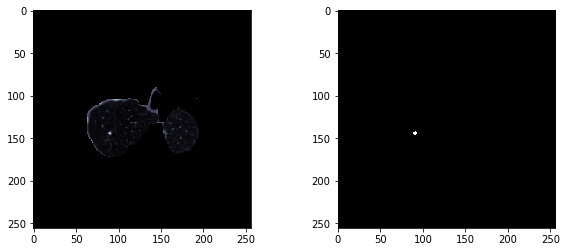

In [4]:
# 2.3: visualize

idx = np.random.randint(len(os.listdir('data/processed/image')))
# idx = 295
img = imread(f'data/processed/image/{idx}.tif') 
mask = imread(f'data/processed/label/{idx}.tif') 
print(idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(img), cmap='bone')
axs[1].imshow(np.array(mask), cmap='bone')
plt.show()

# (3) Split into test and train

In [67]:
# 3.1: clear out old data
shutil.rmtree('data/train')
shutil.rmtree('data/test')

In [68]:
# 3.2: split
test_train_split('data/processed', 'data/train', 'data/test')

423.tif


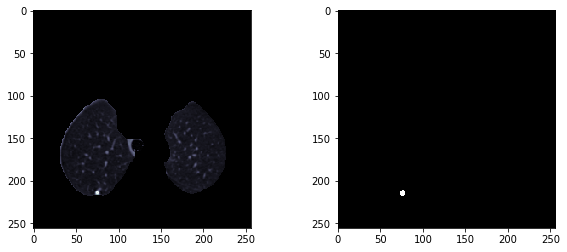

In [69]:
# 3.3a: visualize training set
train_idx = os.listdir('data/train/image')[np.random.randint(len(os.listdir('data/train/image')))]
train_img = imread(f'data/train/image/{train_idx}') 
train_mask = imread(f'data/train/label/{train_idx}') 

print(train_idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(train_img), cmap='bone')
axs[1].imshow(np.array(train_mask), cmap='bone')
plt.show()


### Test data

74.tif


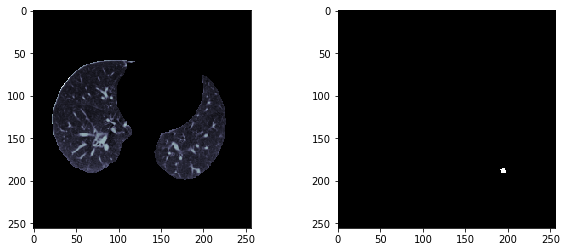

In [70]:
# 3.3b: visualize test set
test_idx = os.listdir('data/test/image')[np.random.randint(len(os.listdir('data/test/image')))]

test_img = imread(f'data/test/image/{test_idx}') 
test_mask = imread(f'data/test/label/{test_idx}') 

print(test_idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(test_img), cmap='bone')
axs[1].imshow(np.array(test_mask), cmap='bone')
plt.show()